# 📊 LinkedIn Data Science Jobs Tracker - Exploratory Data Analysis
*por Renan*  

**Objetivo**: Usar o arquivo .csv com as vagas carregadas para avaliar o perfil, palavras-chave e características.  
**Tecnologias**: Jupyter Notebook, Pandas, Matplotlib, Seaborn. 

In [21]:
#Bibliotecas utilizadas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

## 🔍 Etapa 1: Carregar o arquivo .csv  1)`  

In [5]:
arquivo = pd.read_csv('linkedin_datascience_jobs.csv')
arquivo

,title,company,location,posted,description,applicants,work_mode,link
0,Consultor Performance Negócios (Cientista / Da...,SulAmérica,"São Paulo, SP",Há 4 dias,DescriçãoResponsável por centralizar todos os ...,NaN,On-site/Hybrid,https://www.linkedin.com/jobs-guest/jobs/api/j...
1,Cientista de Dados Senior,CSU Digital,"Barueri, SP",Há 1 mês,O profissional irá trabalhar com um time multi...,NaN,On-site/Hybrid,https://www.linkedin.com/jobs-guest/jobs/api/j...
2,Data Scientist | Marketing Analytics,DP6,"São Paulo, SP",Há 6 dias,Nós somos a DP6!Otimizamos a eficiência do Mar...,NaN,On-site/Hybrid,https://www.linkedin.com/jobs-guest/jobs/api/j...
3,Banco de Talentos - Profissionais com Deficiência,Cognizant,São Paulo e Região,Há 5 dias,A Cognizant está sempre à procura de grandes t...,NaN,On-site/Hybrid,https://www.linkedin.com/jobs-guest/jobs/api/j...
4,Gestor de Tráfego Sênior,V4 Company,"São Paulo, SP",Há 4 dias,🚀 Faça parte da maior unidade da Rede V4 Compa...,NaN,On-site/Hybrid,https://www.linkedin.com/jobs-guest/jobs/api/j...
5,Cientista de Dados Jr. - TI - Data & Analytics...,Alares Internet,"São Paulo, SP",Há 1 mês,"Você é curioso(a), apaixonado(a) por dados e q...",NaN,On-site/Hybrid,https://www.linkedin.com/jobs-guest/jobs/api/j...
6,Cientista de Dados JR,Mitsui Sumitomo Seguros,"São Paulo, SP",Há 3 semanas,DESCRIÇÃOPrincipais AtividadesApoiar na extraç...,NaN,On-site/Hybrid,https://www.linkedin.com/jobs-guest/jobs/api/j...
7,Cientista de Dados - Júnior,IBM,"São Paulo, SP",Há 2 semanas,IntroductionIn this role you will join IBM Con...,NaN,On-site/Hybrid,https://www.linkedin.com/jobs-guest/jobs/api/j...
8,Cientista de Dados JR,Mitsui Sumitomo Seguros,São Paulo e Região,Há 3 semanas,"Principais AtividadesApoiar na extração, trata...",NaN,On-site/Hybrid,https://www.linkedin.com/jobs-guest/jobs/api/j...
9,Pessoa Cientista de Dados - Vaga afirmativa pa...,Artefact,"São Paulo, SP",Há 6 horas,"A abertura atual é para a Artefact do Brasil, ...",NaN,On-site/Hybrid,https://www.linkedin.com/jobs-guest/jobs/api/j...


In [6]:
# Cria DataFrame
df = pd.DataFrame(arquivo)

In [7]:
display(df.head()) 

,title,company,location,posted,description,applicants,work_mode,link
0,Consultor Performance Negócios (Cientista / Da...,SulAmérica,"São Paulo, SP",Há 4 dias,DescriçãoResponsável por centralizar todos os ...,NaN,On-site/Hybrid,https://www.linkedin.com/jobs-guest/jobs/api/j...
1,Cientista de Dados Senior,CSU Digital,"Barueri, SP",Há 1 mês,O profissional irá trabalhar com um time multi...,NaN,On-site/Hybrid,https://www.linkedin.com/jobs-guest/jobs/api/j...
2,Data Scientist | Marketing Analytics,DP6,"São Paulo, SP",Há 6 dias,Nós somos a DP6!Otimizamos a eficiência do Mar...,NaN,On-site/Hybrid,https://www.linkedin.com/jobs-guest/jobs/api/j...
3,Banco de Talentos - Profissionais com Deficiência,Cognizant,São Paulo e Região,Há 5 dias,A Cognizant está sempre à procura de grandes t...,NaN,On-site/Hybrid,https://www.linkedin.com/jobs-guest/jobs/api/j...
4,Gestor de Tráfego Sênior,V4 Company,"São Paulo, SP",Há 4 dias,🚀 Faça parte da maior unidade da Rede V4 Compa...,NaN,On-site/Hybrid,https://www.linkedin.com/jobs-guest/jobs/api/j...


In [8]:
habilidades = ["sql", "python", "machine learning", "aws", "cloud"]

In [11]:
df["skills"] = df["description"].apply(lambda desc: [skill for skill in habilidades if re.search(rf"\b{skill}\b", desc.lower())])

In [12]:
skills_count = pd.Series([skill for sublist in df["skills"] for skill in sublist]).value_counts()
print(skills_count)

python              30
sql                 28
machine learning    17
cloud                8
aws                  6
Name: count, dtype: int64


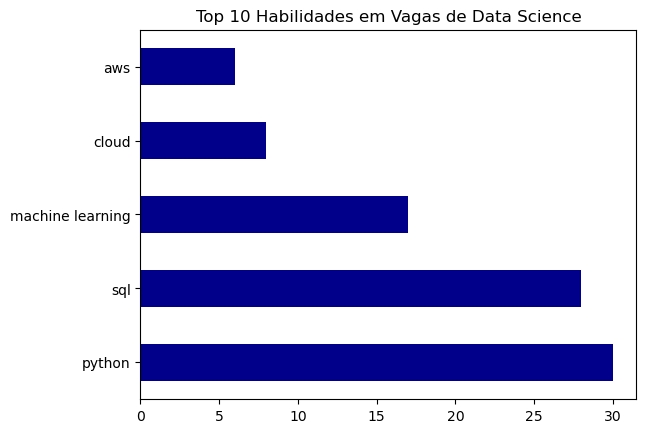

In [13]:
skills_count.plot(kind="barh", color="darkblue")
plt.title("Top 10 Habilidades em Vagas de Data Science")
plt.show()

In [14]:
df.head()

,title,company,location,posted,description,applicants,work_mode,link,skills
0,Consultor Performance Negócios (Cientista / Da...,SulAmérica,"São Paulo, SP",Há 4 dias,DescriçãoResponsável por centralizar todos os ...,NaN,On-site/Hybrid,https://www.linkedin.com/jobs-guest/jobs/api/j...,[sql]
1,Cientista de Dados Senior,CSU Digital,"Barueri, SP",Há 1 mês,O profissional irá trabalhar com um time multi...,NaN,On-site/Hybrid,https://www.linkedin.com/jobs-guest/jobs/api/j...,"[sql, python, machine learning]"
2,Data Scientist | Marketing Analytics,DP6,"São Paulo, SP",Há 6 dias,Nós somos a DP6!Otimizamos a eficiência do Mar...,NaN,On-site/Hybrid,https://www.linkedin.com/jobs-guest/jobs/api/j...,"[sql, python, machine learning]"
3,Banco de Talentos - Profissionais com Deficiência,Cognizant,São Paulo e Região,Há 5 dias,A Cognizant está sempre à procura de grandes t...,NaN,On-site/Hybrid,https://www.linkedin.com/jobs-guest/jobs/api/j...,[]
4,Gestor de Tráfego Sênior,V4 Company,"São Paulo, SP",Há 4 dias,🚀 Faça parte da maior unidade da Rede V4 Compa...,NaN,On-site/Hybrid,https://www.linkedin.com/jobs-guest/jobs/api/j...,[]


In [15]:
descricao_habilidades = df["description"]

In [16]:
palavras = " ".join(palavra for palavra in descricao_habilidades)

In [17]:
stopwords = set(STOPWORDS)

In [18]:
stopwords.update(['vaga', 'nós', 'estar', 'será', 'todos', 'das', 'sempre', 'will', 'etc', 'fazer', 'aos', 'ano', 'os', 'até', 'suas', 'ser', 'além', 'pessoa', 'cada', 'à', 'todas', 'são', 'não', 'nos', 'sua', 'nossos', 'sobre', 'utilizando', 'nossa', 'onde', 'dia', 'todo', 'a', 'de', 'e', 'para', 'em', 'da', 'atividades', 'principais', 'do', 'somos', 'um', 'é', 'está', 'busca', 'buscando', 'dados', 'que', 'o', 'nosso', 'na', 'como', 'você', 'trabalhar', 'ou', 'mais','ao','seu','por','toda','less', 'more', 'Show', 'se', 'uma', 'dos', 'estamos', 'moreShow', 'você', 'deficiência', 'disability', 'odontológico', 'saúde', 'nossas', 'Entrevista', 'anos','parte','pelo', 'Desconto', 'aqui'])

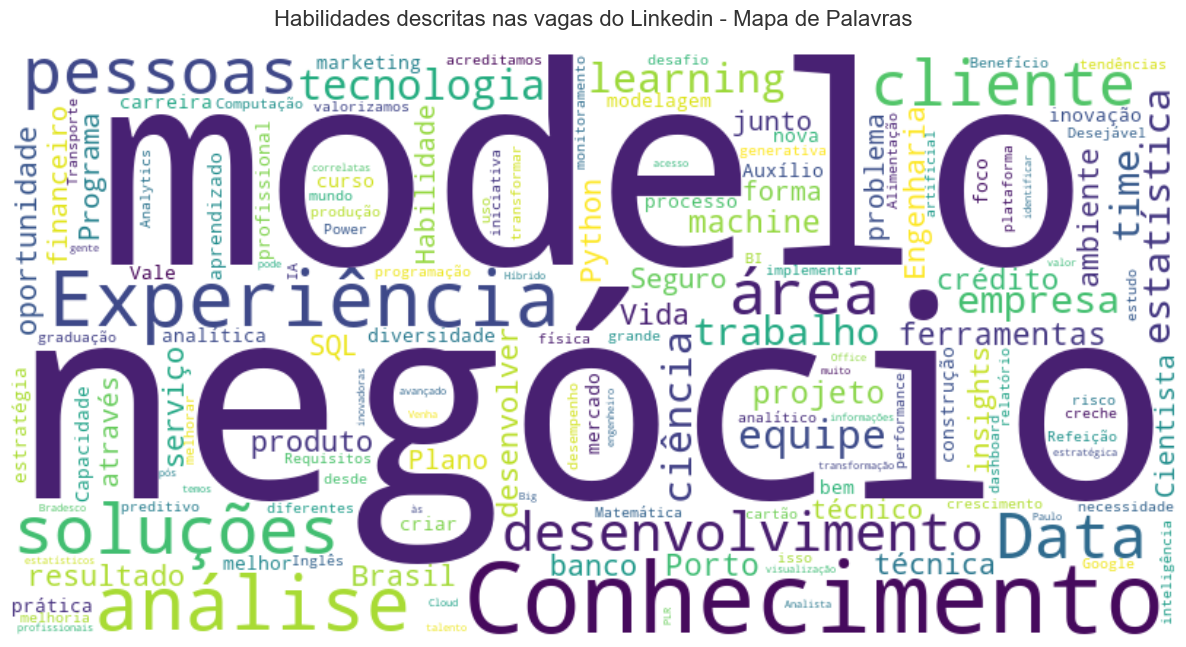

In [30]:
wordcloud = WordCloud(stopwords=stopwords,
    width=800, 
    height=400,
    background_color='white',  # fundo branco
    colormap='viridis',       # esquema de cores
    contour_width=1,          # borda ao redor da nuvem
    contour_color='steelblue',# cor da borda
    max_words=150,            # limitar número de palavras
    collocations=False,       # evitar repetições de frases
    prefer_horizontal=0.8,    # proporção de palavras horizontais
    min_font_size=4,          # tamanho mínimo da fonte
    random_state=42           # para reprodutibilidade
).generate(palavras)

# Configurar figura
plt.figure(figsize=(12, 8), facecolor='white', edgecolor='blue')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Título
plt.title("Habilidades descritas nas vagas do Linkedin - Mapa de Palavras", 
          fontsize=16, pad=20, color='#333333')
plt.tight_layout(pad=1)  # ajustar espaçamento

# Opcional: salvar
#plt.savefig('wordcloud_profissional.png', dpi=300, bbox_inches='tight', quality=100)

plt.show()

In [22]:
# Configurações visuais
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [34]:
if df["work_mode"].nunique() > 1:
    sns.countplot(x="work_mode", data=df)
    plt.title("Distribuição por Modalidade de Trabalho")
    plt.show()
else:
    print("Todas as vagas são:", df['work_mode'].iloc[0])


Todas as vagas são: On-site/Hybrid


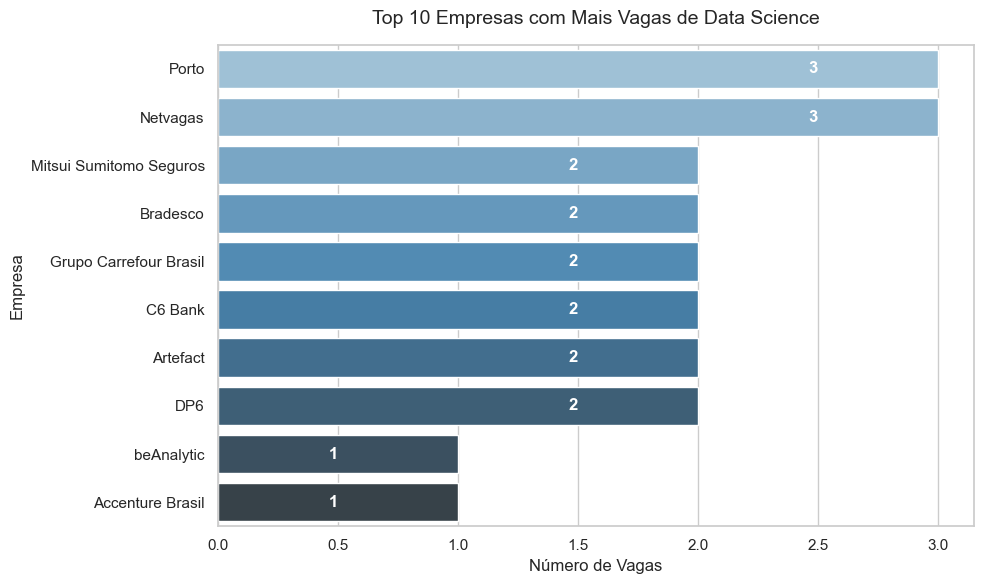

In [37]:
# Dados
company_counts = df["company"].value_counts().head(10)

# Estilo visual
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Gráfico de barras horizontais
ax = sns.barplot(x=company_counts.values, y=company_counts.index, palette="Blues_d")

# Título e rótulos
plt.title("Top 10 Empresas com Mais Vagas de Data Science", fontsize=14, pad=15)
plt.xlabel("Número de Vagas")
plt.ylabel("Empresa")

# Adiciona os valores dentro das barras
for i, (v, label) in enumerate(zip(company_counts.values, company_counts.index)):
    ax.text(v - 0.5, i, str(v), color='white', va='center', ha='right', fontweight='bold')

# Ajusta layout
plt.tight_layout()
plt.show()